# _`automaton`_`.multiply`

This function is overloaded, it supports three different signatures:

- _`automaton`_`.multiply(`_`exp`_`)`

  The product (i.e., the concatenation) of two automata.

- _`automaton`_`.multiply(`_`num`_`)`

  The repeated multiplication (concatenation) of an automaton with itself.  Exponent `-1` denotes the infinity: the Kleene star.

- _`automaton`_`.multiply((`_`min`_`, `_`max`_`))`

  The sum of repeated multiplications of an automaton.

Preconditions:
- _`min`_ ` <= ` _`max`_
- _`exp`_ is standard.

See also:
- [expression.multiply](expression.multiply.ipynb)
- [polynomial.multiply](polynomial.multiply.ipynb)

## Examples

In [1]:
import vcsn
ctx = vcsn.context('lal_char, q')
def aut(e):
    return ctx.expression(e).standard()

### Simple Multiplication
Instead of `a.multiply(b)`, you may write `a * b`.

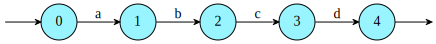

In [2]:
aut('ab') * aut('cd')

### Repeated Multiplication
Instead of `a.multiply(3)`, you may write `a ** 3`.  Beware that `a * 3` actually denotes `a.right_mult(3)`.

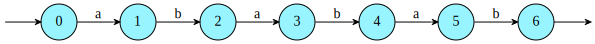

In [3]:
aut('ab') ** 3

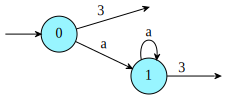

In [4]:
aut('a*') * 3

Use the exponent -1 to mean `infinity`.  Alternatively, you may invoke `a.star` instead of `a ** -1`.

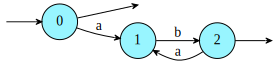

In [5]:
aut('ab') ** -1

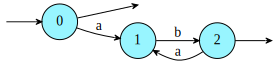

In [6]:
aut('ab').star()

### Sums of Repeated Multiplications
Instead of `a.multiply((2, 4))`, you may write `a ** (2, 4)`.  Again, use exponent -1 to mean infinity.

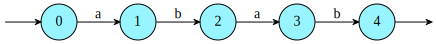

In [7]:
aut('ab') ** (2, 2)

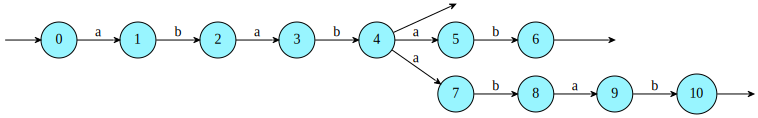

In [8]:
aut('ab') ** (2, 4)

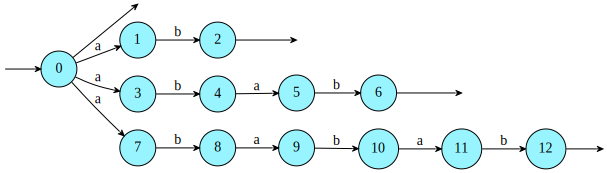

In [9]:
aut('ab') ** (-1, 3)

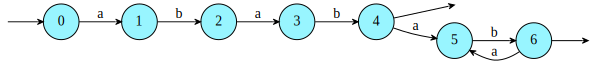

In [10]:
aut('ab') ** (2, -1)